#### Problem Statement :
To predict the Customer life time value for an auto insurance company based on different quantitative and qualitative features provided.

#### Problem Description
Forecasting is an important approach to take an optimal decision and implement appropriate action plans. A major non-life insurance company wants to evaluate customer life time value based on each customer’s demographics and policy information including claim details. The CLV is a profitability metric in terms of a value placed by the company on each customer and can be conceived in two dimensions: the customer`s present Value and potential future Value.

You are expected to create an analytical and modelling framework to predict the life time value of each customer based on the quantitative and qualitative features provided in the dataset and also cluster the train dataset to understand behaviour of each segment.

In [1]:
#import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#loading data
train_data = pd.read_csv("train-1574429526318.csv")
test_data = pd.read_csv("test-1574429501088.csv")

### Explotary Data Analysis:

In [3]:
# To get the top 5 records of train
train_data.head()

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0,"17.7,77.7",Urban,Married,...,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357,"28.8,76.6",Suburban,Married,...,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125,"21.6,88.4",Urban,Married,...,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544,"19,72.5",Suburban,Married,...,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651,"19.1,74.7",Suburban,Married,...,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


In [4]:
# To get the top 5 records of test
test_data.head()

,CustomerID,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,17,Basic,Bachelor,Employed,M,43836.0,"12.6,79.4",Rural,Single,73.0,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
1,19,Extended,College,Employed,F,28812.0,"17.3,78.4",Urban,Married,93.0,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize
2,29,Premium,Master,Employed,M,77026.0,"18.4,73.5",Urban,Married,110.0,...,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.029737,Four-Door Car,Medsize
3,34,Basic,Bachelor,Employed,F,24599.0,"17.1,78.2",Rural,Married,64.0,...,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920271,Four-Door Car,Medsize
4,37,Extended,Bachelor,Disabled,F,13789.0,"13,80.1",Suburban,Divorced,79.0,...,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200000,Four-Door Car,Medsize


In [5]:
train_data.describe(include ='all')

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
count,9806.000000,9806.000000,8881,9677,9688,9677,9806,9806,9687,9677,...,9806.000000,8988.000000,9685.000000,8915,9685,9678,9678,9806.000000,9680,9680.000000
unique,NaN,NaN,3,5,5,2,4622,2840,3,3,...,NaN,NaN,NaN,3,9,4,4,NaN,6,NaN
top,NaN,NaN,Basic,Bachelor,Employed,F,0,"NA,NA",Suburban,Married,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,NaN
freq,NaN,NaN,5361,2934,6020,4985,2461,119,6204,5643,...,NaN,NaN,NaN,6620,3637,3975,3670,NaN,4869,NaN
mean,5778.381807,7998.047015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.165001,0.379172,2.960351,NaN,NaN,NaN,NaN,438.266734,NaN,2.089773
std,3343.286093,6848.055899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.963630,0.896427,2.389801,NaN,NaN,NaN,NaN,293.502301,NaN,0.538524
min,1.000000,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,1.000000
25%,2879.250000,4013.949039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,280.352767,NaN,2.000000
50%,5783.000000,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,384.007015,NaN,2.000000
75%,8678.750000,8960.280213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.750000,0.000000,4.000000,NaN,NaN,NaN,NaN,553.540973,NaN,2.000000


In [6]:
# To get the dimensions of train data
train_data.shape

(9806, 22)

In [7]:
# To get the dimensions of test data
test_data.shape

(1767, 21)

In [8]:
#removing duplicates from train data
train_data.drop_duplicates(keep='first', inplace=True)
train_data.shape

(9806, 22)

In [9]:
#removing duplicates from test data
test_data.drop_duplicates(keep='first', inplace=True)
test_data.shape

(1767, 21)

In [10]:
#checking data types of train data
train_data.dtypes

CustomerID                         int64
Customer.Lifetime.Value          float64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                            object
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints        float64
Number.of.Policies               float64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                     float64
dtype: object

In [11]:
#checking data types of test data
test_data.dtypes

CustomerID                         int64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints          int64
Number.of.Policies                 int64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                      object
dtype: object

In [12]:
#checking any unique values are there in train data
train_data.nunique()

CustomerID                       9806
Customer.Lifetime.Value          6477
Coverage                            3
Education                           5
EmploymentStatus                    5
Gender                              2
Income                           4622
Location.Geo                     2840
Location.Code                       3
Marital.Status                      3
Monthly.Premium.Auto              191
Months.Since.Last.Claim            36
Months.Since.Policy.Inception     100
Number.of.Open.Complaints           6
Number.of.Policies                  9
Policy.Type                         3
Policy                              9
Renew.Offer.Type                    4
Sales.Channel                       4
Total.Claim.Amount               4125
Vehicle.Class                       6
Vehicle.Size                        3
dtype: int64

In [13]:
#checking sum of null values from train data
train_data.isnull().sum()

CustomerID                         0
Customer.Lifetime.Value            0
Coverage                         925
Education                        129
EmploymentStatus                 118
Gender                           129
Income                             0
Location.Geo                       0
Location.Code                    119
Marital.Status                   129
Monthly.Premium.Auto             794
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints        818
Number.of.Policies               121
Policy.Type                      891
Policy                           121
Renew.Offer.Type                 128
Sales.Channel                    128
Total.Claim.Amount                 0
Vehicle.Class                    126
Vehicle.Size                     126
dtype: int64

In [14]:
#checking sum of null values from test data
test_data.isnull().sum()

CustomerID                         0
Coverage                           0
Education                          0
EmploymentStatus                   0
Gender                             0
Income                           239
Location.Geo                       0
Location.Code                      0
Marital.Status                     0
Monthly.Premium.Auto              72
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints          0
Number.of.Policies                 0
Policy.Type                       42
Policy                             0
Renew.Offer.Type                   0
Sales.Channel                      0
Total.Claim.Amount                 0
Vehicle.Class                      0
Vehicle.Size                       0
dtype: int64

In [15]:
#import klib
#klib.dist_plot(train_data)
cols = train_data.columns
cols

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


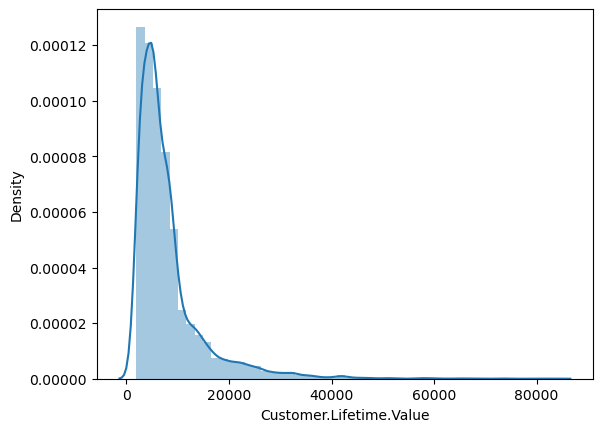

In [16]:
#histogram
sns.distplot(train_data['Customer.Lifetime.Value']);

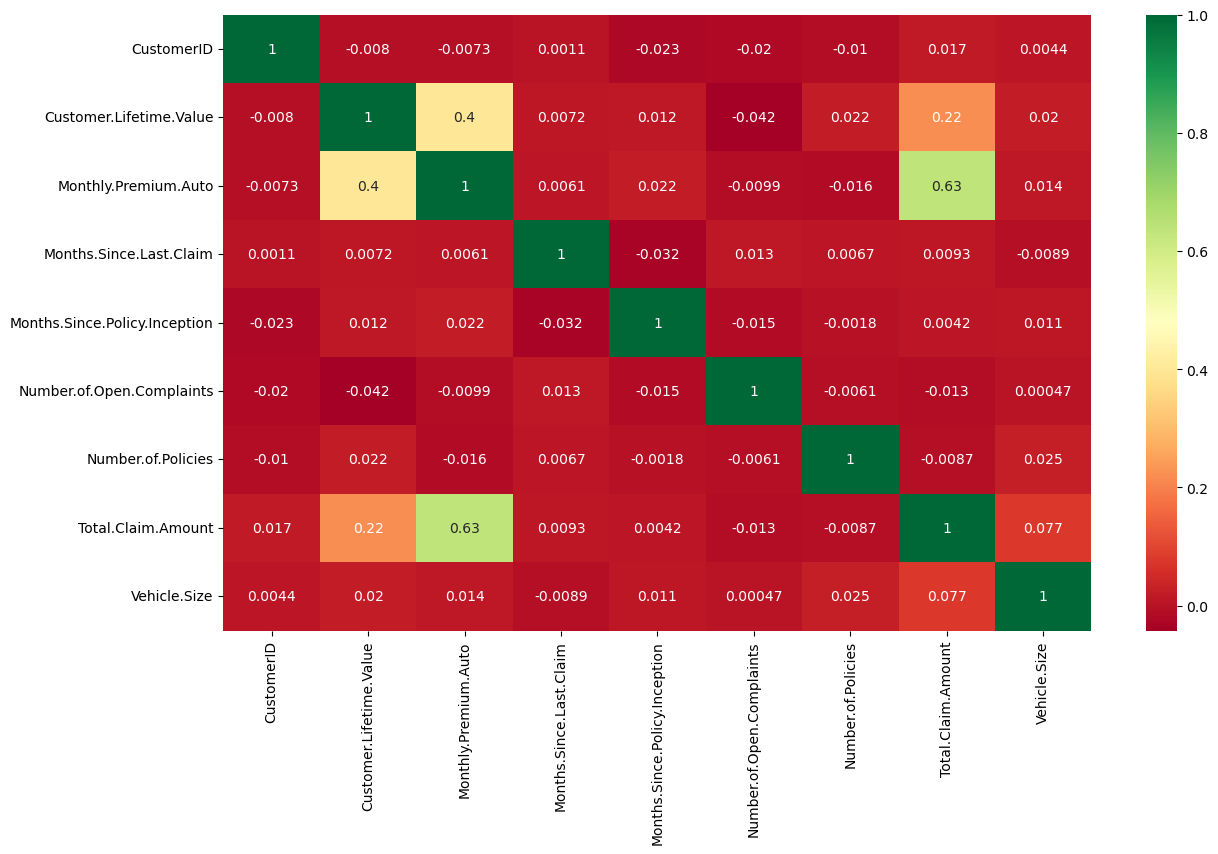

In [17]:
#Plotting correlation
corrmat= train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,8))

#To plot heatmap
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
test_data1 = test_data.copy()

In [19]:
xtr = train_data.drop(["CustomerID","Customer.Lifetime.Value"],axis=1)
xte = test_data.drop(["CustomerID"],axis=1)

C:\Users\Nandu\AppData\Local\Temp\ipykernel_20140\1356236228.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  xtr.hist(ax = ax, bins = 15)


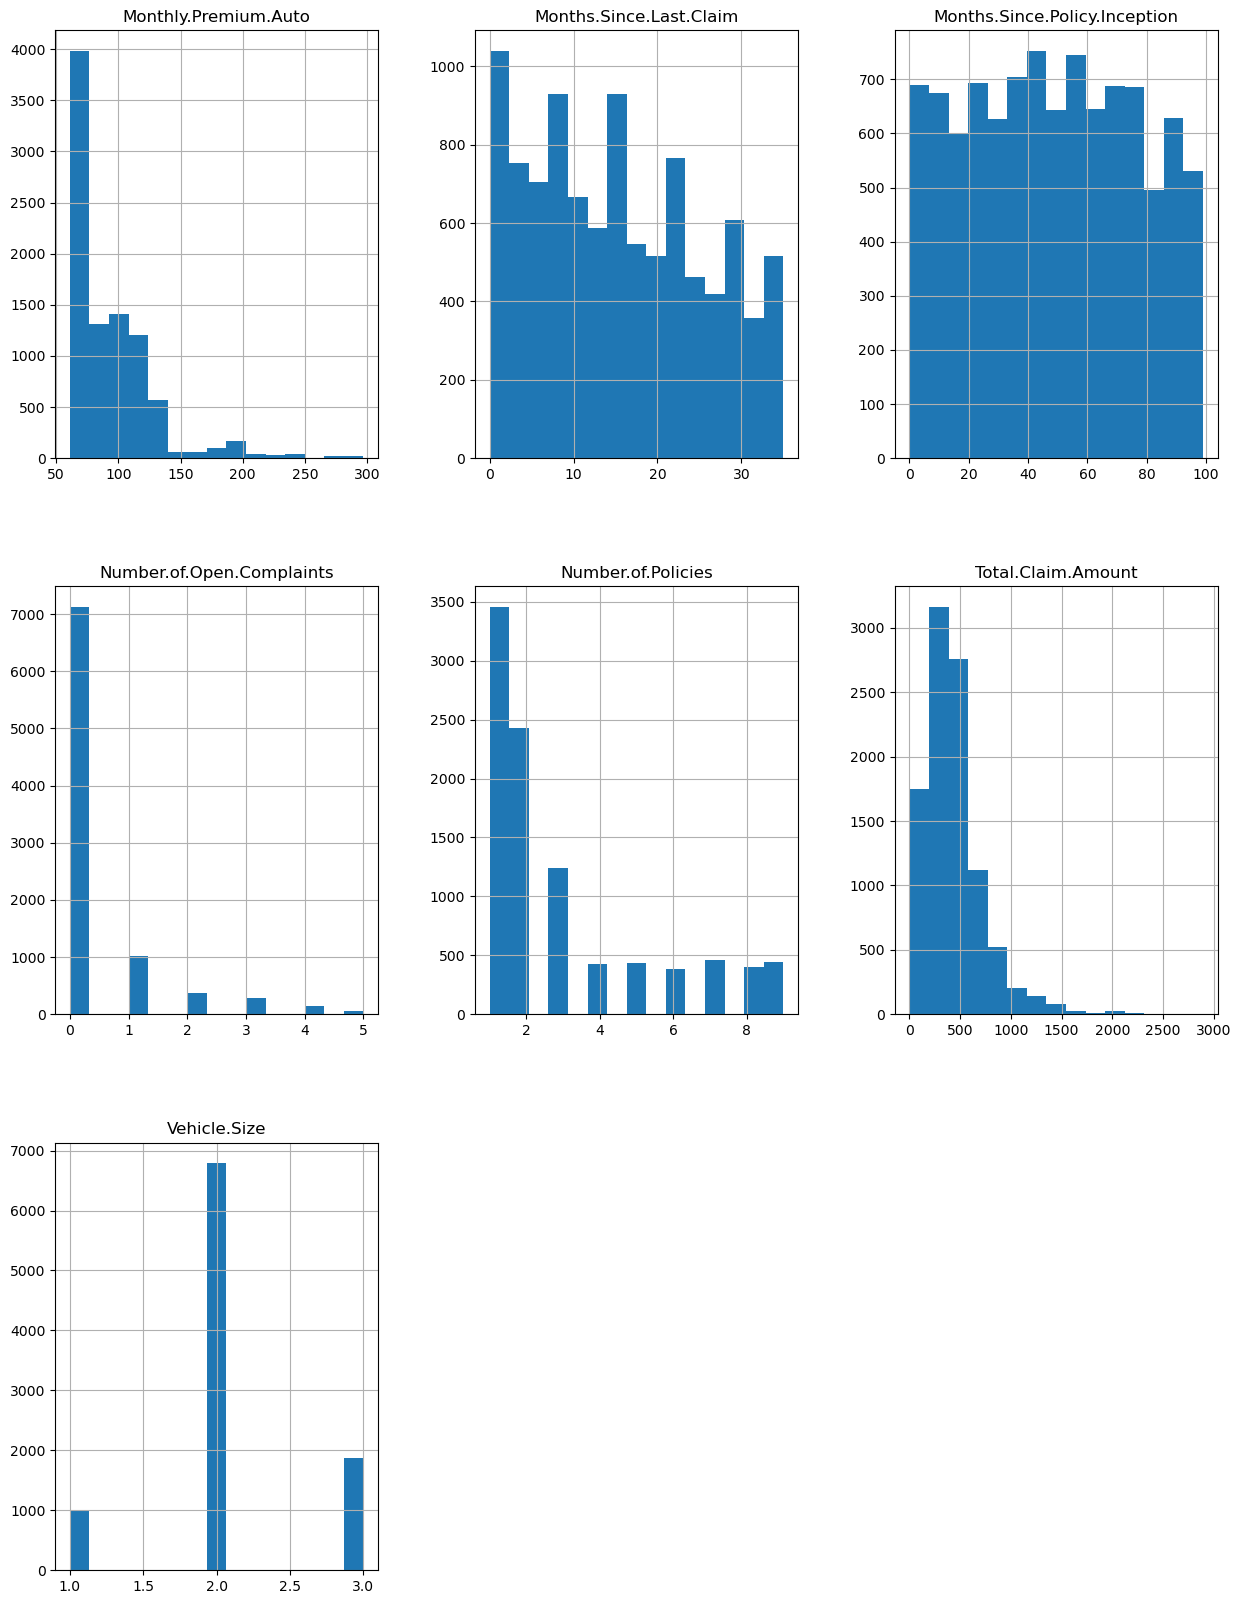

In [20]:
# Histogram to check the distribution of all the numerical columns
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
xtr.hist(ax = ax, bins = 15)
plt.show()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

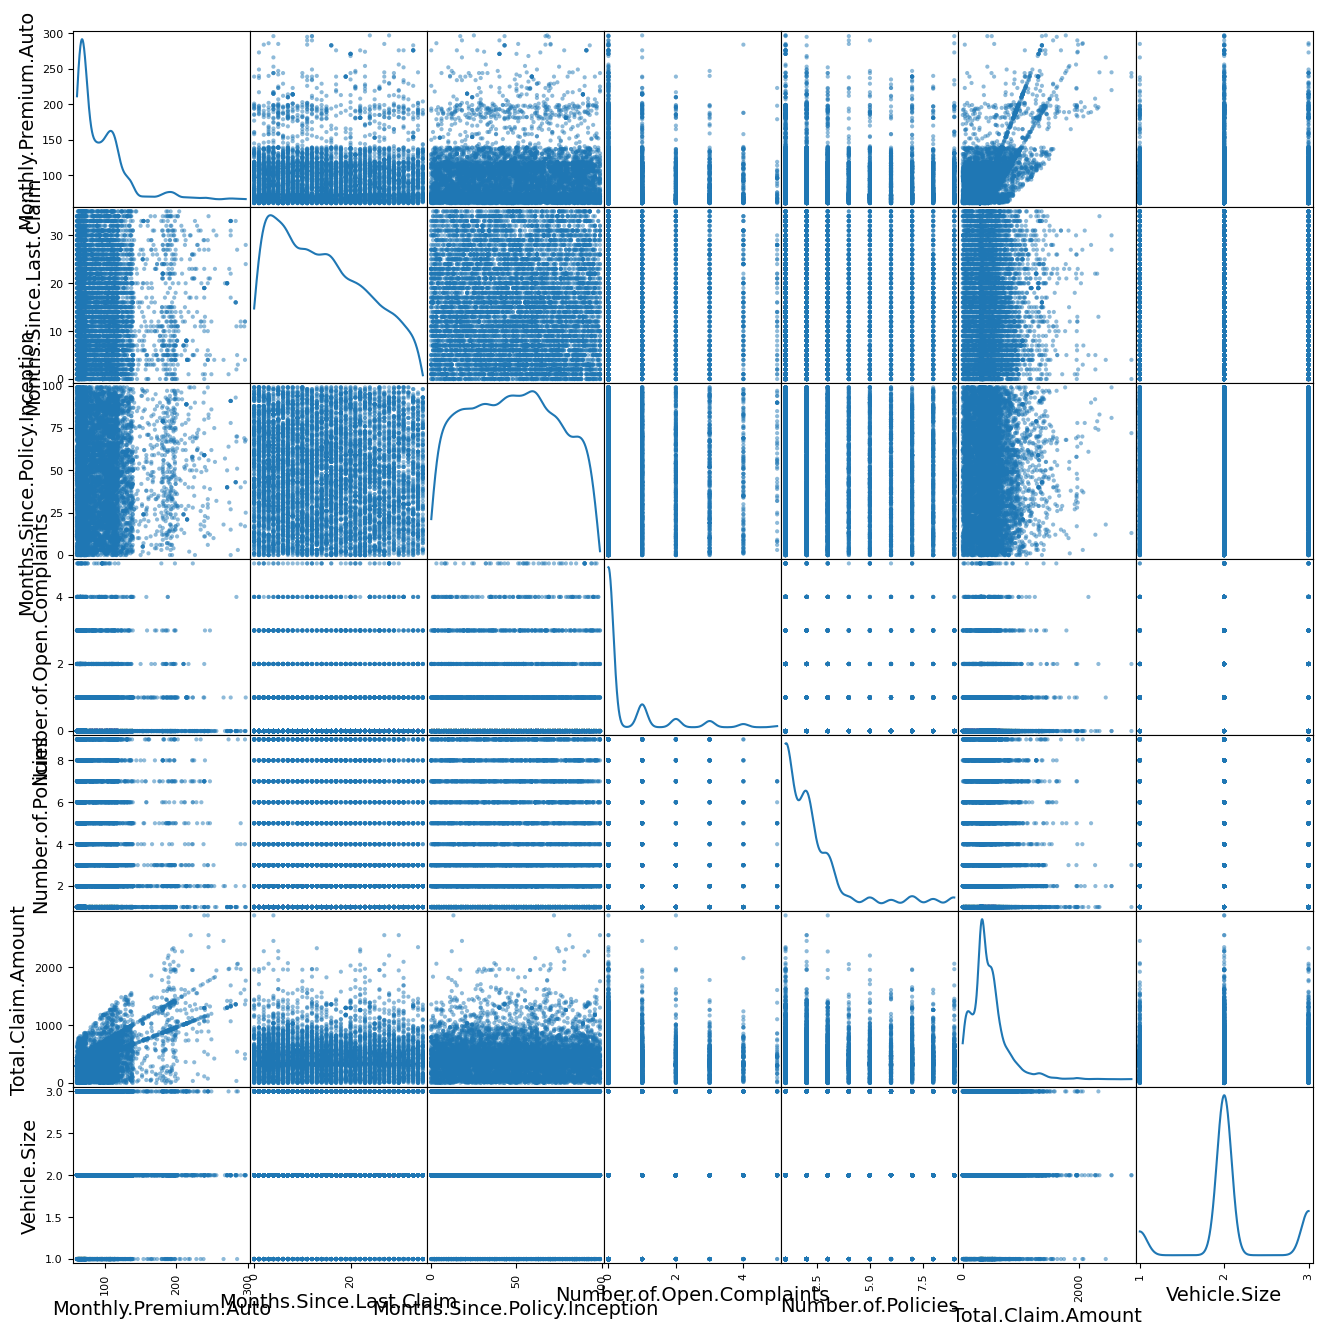

In [21]:
# Scatterplot to check the relation between each pair of numerical columns
pd.plotting.scatter_matrix(xtr, figsize=(16, 16), diagonal='kde')
plt.show()

In [22]:
ytr = train_data[["Customer.Lifetime.Value"]]

In [23]:
ytr["Customer.Lifetime.Value"] = ytr["Customer.Lifetime.Value"].astype("category")

C:\Users\Nandu\AppData\Local\Temp\ipykernel_20140\2439043609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytr["Customer.Lifetime.Value"] = ytr["Customer.Lifetime.Value"].astype("category")


In [24]:
cat_cols = [col for col in xtr.columns if xtr.dtypes[col]=="object"]
cat_cols

['Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location.Geo',
 'Location.Code',
 'Marital.Status',
 'Policy.Type',
 'Policy',
 'Renew.Offer.Type',
 'Sales.Channel',
 'Vehicle.Class']

In [25]:
num_cols = [col for col in xtr.columns if xtr.dtypes[col] !="object"]
num_cols

['Monthly.Premium.Auto',
 'Months.Since.Last.Claim',
 'Months.Since.Policy.Inception',
 'Number.of.Open.Complaints',
 'Number.of.Policies',
 'Total.Claim.Amount',
 'Vehicle.Size']

In [26]:
xtr_cat = xtr[cat_cols]
xtr_num = xtr[num_cols]
xte_cat = xtr[cat_cols]
xte_num = xtr[num_cols]

### Null value imputation

In [27]:
from sklearn.impute import SimpleImputer
cat_impu=SimpleImputer(strategy="most_frequent")
num_impu=SimpleImputer()
xtr_cat=pd.DataFrame(cat_impu.fit_transform(xtr_cat),columns=cat_cols)
xte_cat=pd.DataFrame(cat_impu.fit_transform(xte_cat),columns=cat_cols)
xtr_num=pd.DataFrame(num_impu.fit_transform(xtr_num),columns=num_cols)
xte_num=pd.DataFrame(num_impu.fit_transform(xte_num),columns=num_cols)


In [28]:
# Function to convert all object columns to categorical
xtr_cat[cat_cols]=xtr_cat[cat_cols].astype("category")
xte_cat[cat_cols]=xte_cat[cat_cols].astype("category")

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [30]:
for col in cat_cols:
    xtr_cat[col]=encoder.fit_transform(xtr_cat[col])
    xte_cat[col]=encoder.fit_transform(xte_cat[col])

In [31]:
xtr_cat.head()

,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
0,0,0,4,0,0,923,2,1,1,4,1,1,0
1,0,1,1,1,3105,2560,1,1,1,4,1,0,3
2,0,3,1,0,3140,1808,2,1,1,3,1,1,3
3,0,1,1,1,3303,1432,1,1,0,2,0,1,3
4,0,0,3,0,316,1501,1,1,1,3,1,3,5


In [32]:
train_data.shape

(9806, 22)

In [33]:
xtr=pd.concat([xtr_num,xtr_cat],axis=1)

In [34]:
xte=pd.concat([xte_num,xte_cat],axis=1)
xclust = xte.copy

In [35]:
columnsxtr = xtr.columns
columnsxtr 

Index(['Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Total.Claim.Amount', 'Vehicle.Size', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender', 'Income', 'Location.Geo',
       'Location.Code', 'Marital.Status', 'Policy.Type', 'Policy',
       'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class'],
      dtype='object')

In [36]:
columnsxte = xte.columns
columnsxte

Index(['Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Total.Claim.Amount', 'Vehicle.Size', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender', 'Income', 'Location.Geo',
       'Location.Code', 'Marital.Status', 'Policy.Type', 'Policy',
       'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class'],
      dtype='object')

In [37]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(xtr)

MinMaxScaler()

In [38]:
xtr = pd.DataFrame(scale.transform(xtr),columns=columnsxtr)

In [39]:
xtr.isnull().sum()

Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Total.Claim.Amount               0
Vehicle.Size                     0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location.Geo                     0
Location.Code                    0
Marital.Status                   0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Vehicle.Class                    0
dtype: int64

In [40]:
xte.isnull().sum()

Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Total.Claim.Amount               0
Vehicle.Size                     0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location.Geo                     0
Location.Code                    0
Marital.Status                   0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Vehicle.Class                    0
dtype: int64

In [41]:
xte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9806 entries, 0 to 9805
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Monthly.Premium.Auto           9806 non-null   float64
 1   Months.Since.Last.Claim        9806 non-null   float64
 2   Months.Since.Policy.Inception  9806 non-null   float64
 3   Number.of.Open.Complaints      9806 non-null   float64
 4   Number.of.Policies             9806 non-null   float64
 5   Total.Claim.Amount             9806 non-null   float64
 6   Vehicle.Size                   9806 non-null   float64
 7   Coverage                       9806 non-null   int32  
 8   Education                      9806 non-null   int32  
 9   EmploymentStatus               9806 non-null   int32  
 10  Gender                         9806 non-null   int32  
 11  Income                         9806 non-null   int32  
 12  Location.Geo                   9806 non-null   i

In [42]:
xte = pd.DataFrame(scale.transform(xte),columns=columnsxte)

In [43]:
xte.head()

,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
0,0.025424,0.057143,0.333333,0.075834,0.125,0.092327,0.5,0.0,0.00,1.00,0.0,0.000000,0.325114,1.0,0.5,0.5,0.500,0.333333,0.333333,0.0
1,0.169492,0.742857,0.424242,0.000000,0.500,0.195431,0.5,0.0,0.25,0.25,1.0,0.671932,0.901726,0.5,0.5,0.5,0.500,0.333333,0.000000,0.6
2,0.199153,0.085714,0.444444,0.000000,0.250,0.127792,0.0,0.0,0.75,0.25,0.0,0.679507,0.636844,1.0,0.5,0.5,0.375,0.333333,0.333333,0.6
3,0.233051,0.057143,0.151515,0.075834,0.250,0.192421,1.0,0.0,0.25,0.25,1.0,0.714780,0.504403,0.5,0.5,0.0,0.250,0.000000,0.333333,0.6
4,0.046610,0.085714,0.686869,0.000000,0.500,0.119421,1.0,0.0,0.00,0.75,0.0,0.068383,0.528707,0.5,0.5,0.5,0.375,0.333333,1.000000,1.0


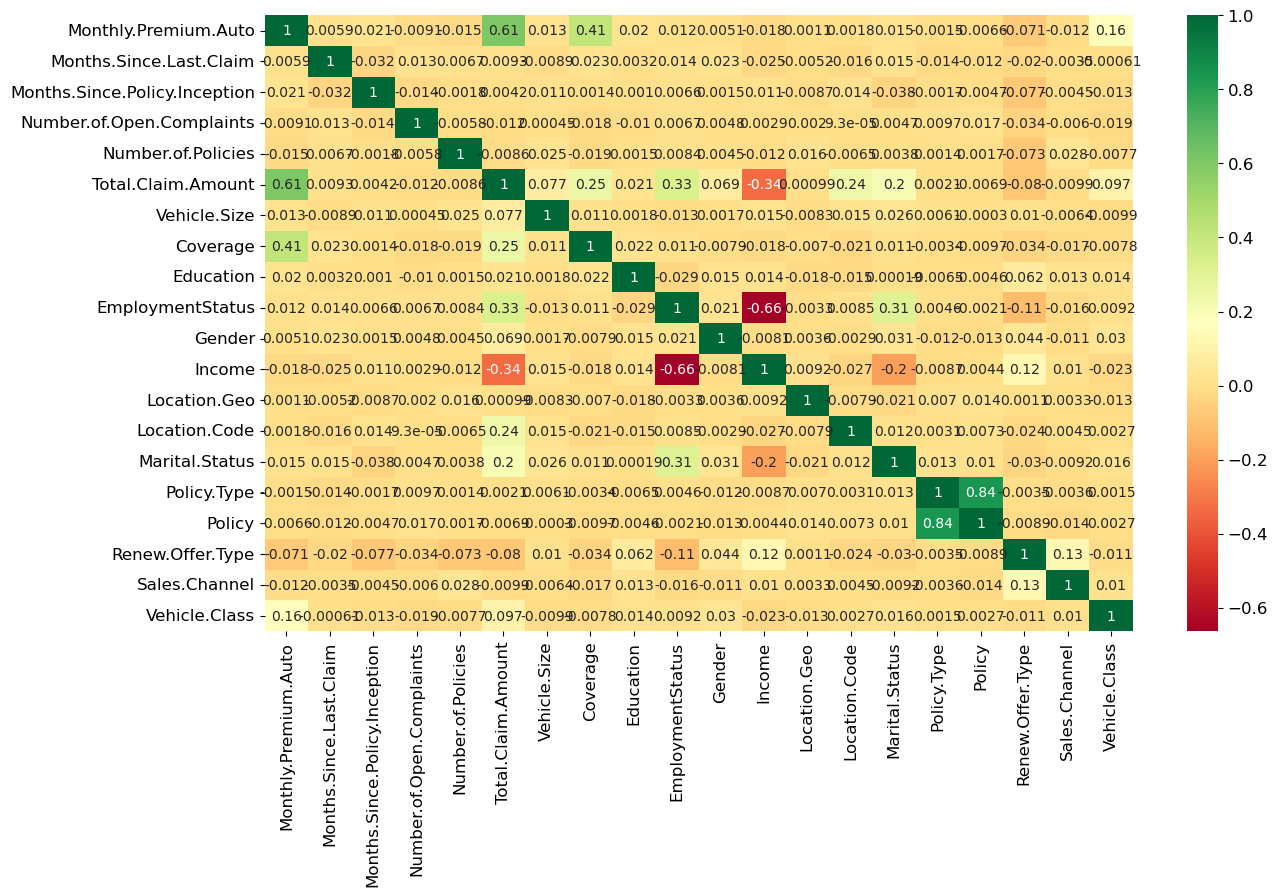

In [44]:
#Plotting correlation
corrmat= xte.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,8))

#To plot heatmap
g=sns.heatmap(xte[top_corr_features].corr(),annot=True,cmap="RdYlGn")

for Monthly.Premium.Auto


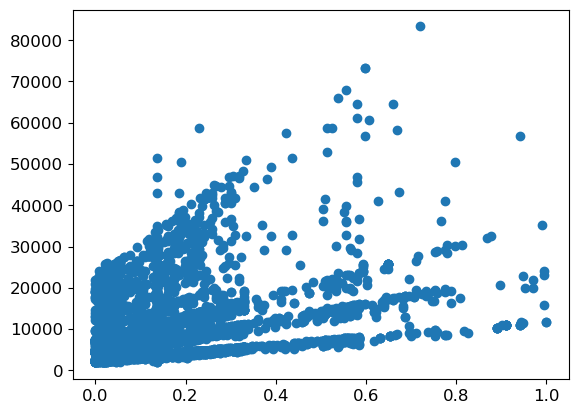

for Months.Since.Last.Claim


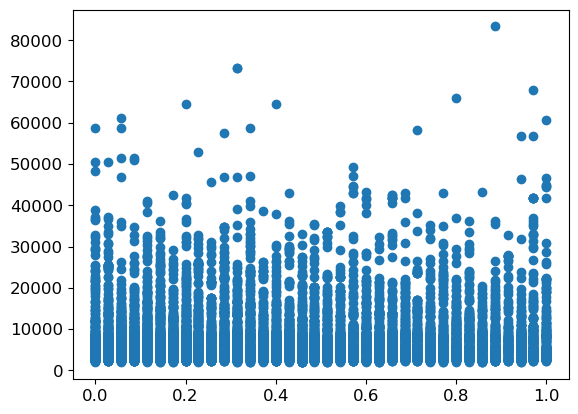

for Months.Since.Policy.Inception


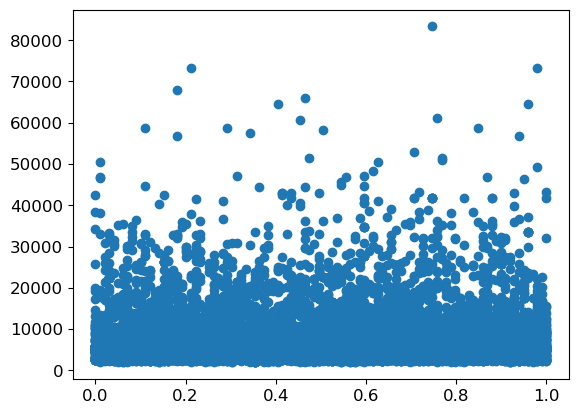

for Number.of.Open.Complaints


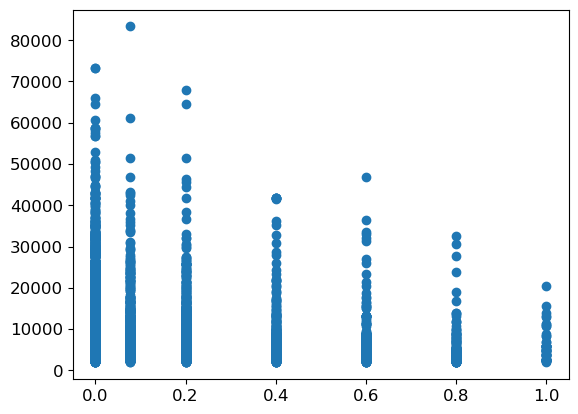

for Number.of.Policies


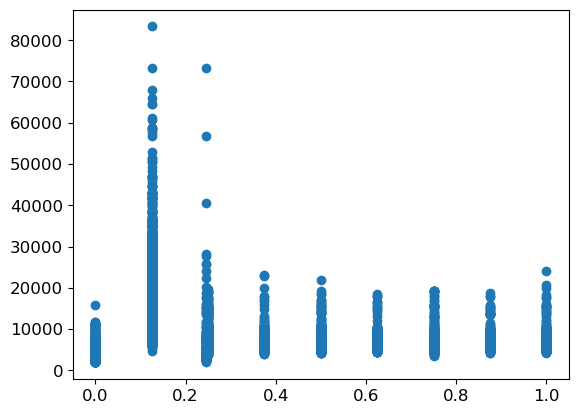

for Total.Claim.Amount


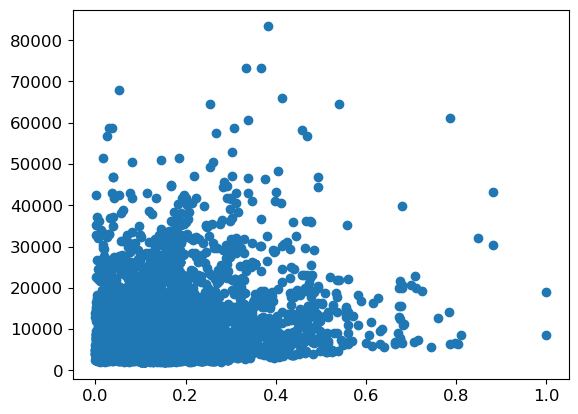

for Vehicle.Size


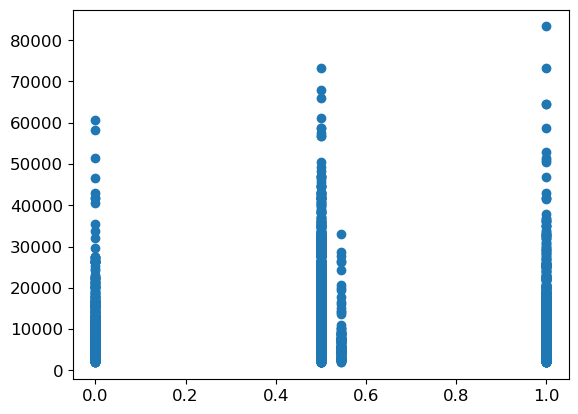

for Coverage


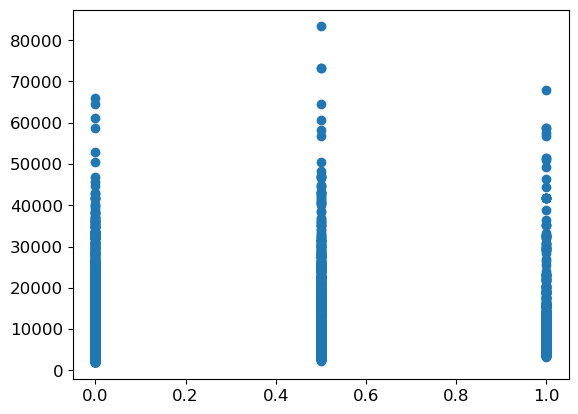

for Education


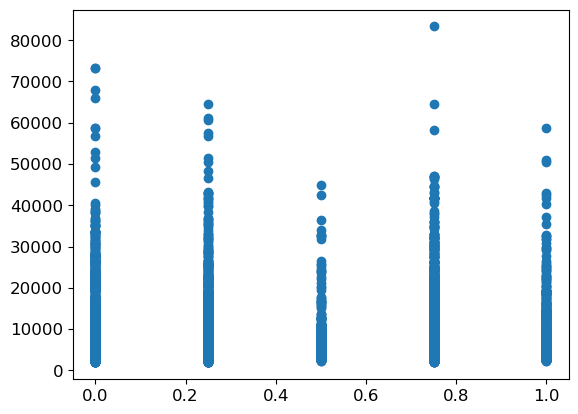

for EmploymentStatus


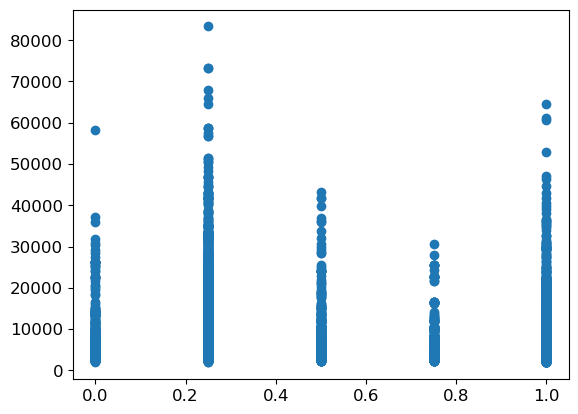

for Gender


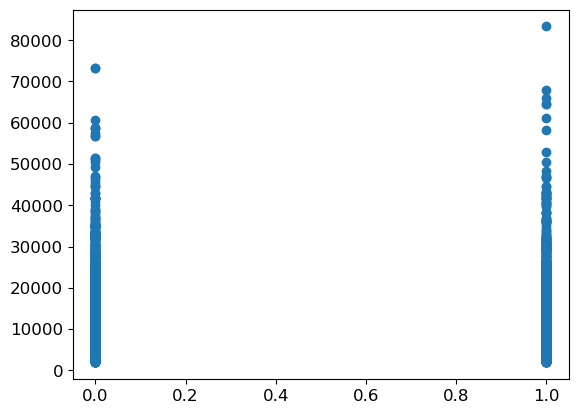

for Income


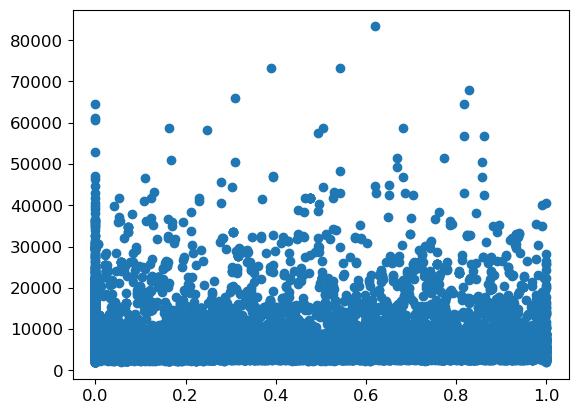

for Location.Geo


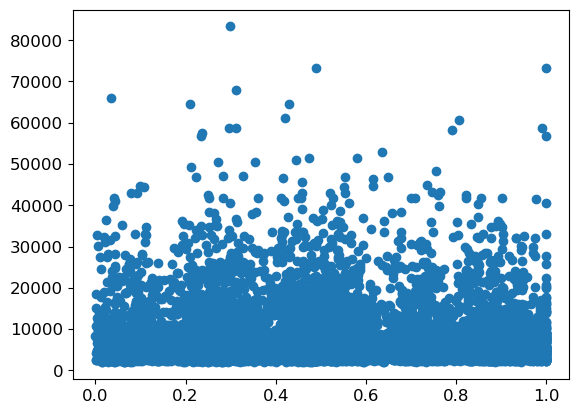

for Location.Code


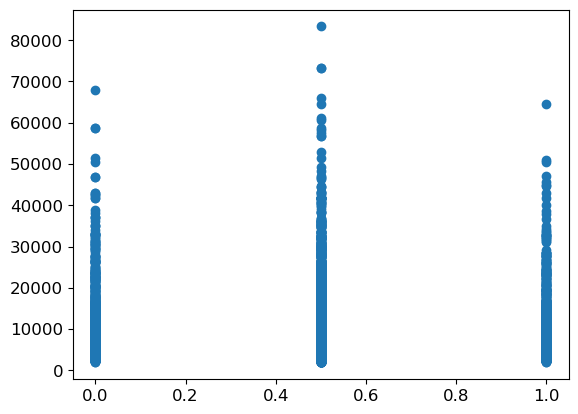

for Marital.Status


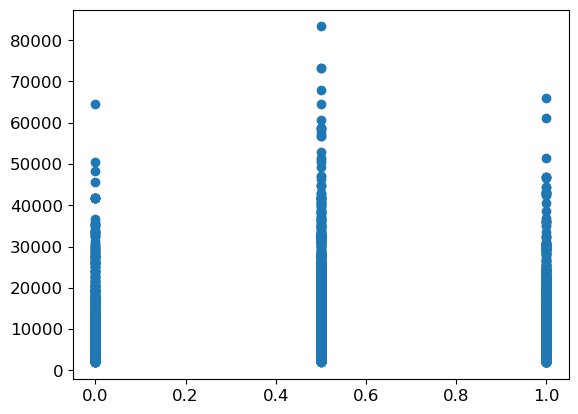

for Policy.Type


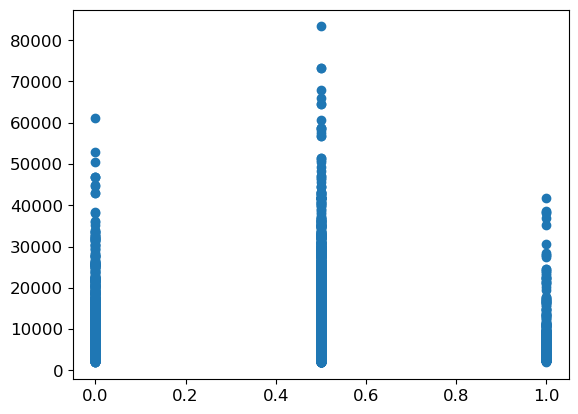

for Policy


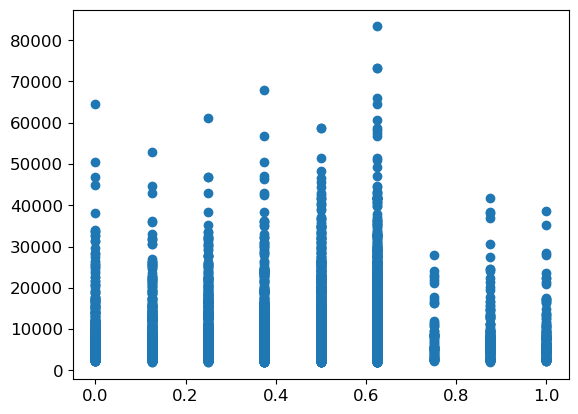

for Renew.Offer.Type


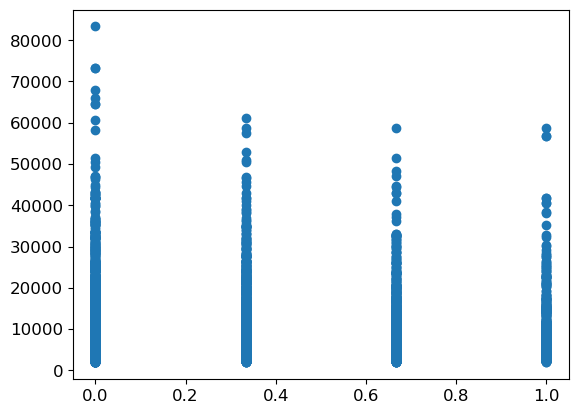

for Sales.Channel


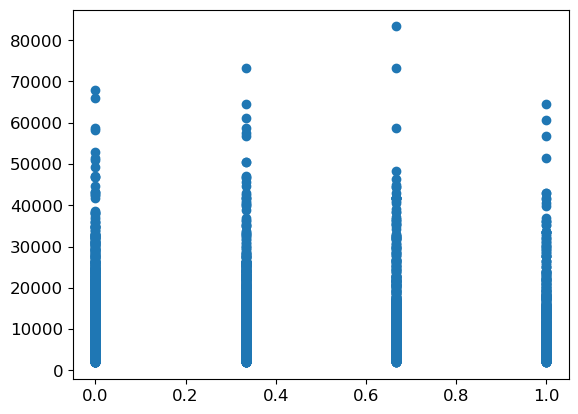

for Vehicle.Class


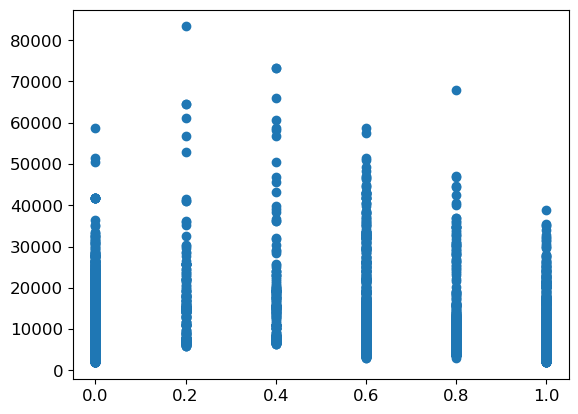

In [45]:
import matplotlib.pyplot as plt
for col in xtr.columns:
    print("for",col)
    plt.scatter(xtr[col],ytr)
    plt.show()

In [46]:
from scipy.stats import pearsonr
for col in xtr.columns:
    print("correlation with Customer_Lifetime_Value and", col)
    print(pearsonr(xtr[col],ytr["Customer.Lifetime.Value"]))
    print("-------------------------------")

correlation with Customer_Lifetime_Value and Monthly.Premium.Auto
PearsonRResult(statistic=0.38774108505945504, pvalue=0.0)
-------------------------------
correlation with Customer_Lifetime_Value and Months.Since.Last.Claim
PearsonRResult(statistic=0.00715145062194654, pvalue=0.4788875335671322)
-------------------------------
correlation with Customer_Lifetime_Value and Months.Since.Policy.Inception
PearsonRResult(statistic=0.011507909545914845, pvalue=0.2545088142021788)
-------------------------------
correlation with Customer_Lifetime_Value and Number.of.Open.Complaints
PearsonRResult(statistic=-0.03976523112871825, pvalue=8.188409571755301e-05)
-------------------------------
correlation with Customer_Lifetime_Value and Number.of.Policies
PearsonRResult(statistic=0.021941637592905544, pvalue=0.02979833287689883)
-------------------------------
correlation with Customer_Lifetime_Value and Total.Claim.Amount
PearsonRResult(statistic=0.22157172047293167, pvalue=2.456140211280518e-10

### Splitting our data

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xtr,ytr,test_size=0.25,random_state=142)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7354, 20)
(2452, 20)
(7354, 1)
(2452, 1)


### Model Building

In [48]:
from sklearn.metrics import precision_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
train_pred=reg.predict(x_train)
test_pred = reg.predict(x_test)
print('RMSE LinearRegression on train : ', np.sqrt(mean_squared_error(y_train, train_pred)))
print('RMSE LinearRegression on test : ', np.sqrt(mean_squared_error(y_test, test_pred)))


RMSE LinearRegression on train :  6275.365412102633
RMSE LinearRegression on test :  6307.671003117549


In [49]:
from sklearn.linear_model import Ridge, Lasso
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(x_train,y_train)

train_pred=ridgeReg.predict(x_train)
test_pred = ridgeReg.predict(x_test)
print('Ridge Regression on train : ', np.sqrt(mean_squared_error(y_train, train_pred)))
print('Ridge Regression on test : ', np.sqrt(mean_squared_error(y_test, test_pred)))

Ridge Regression on train :  6278.8795167229755
Ridge Regression on test :  6307.669637814743


In [50]:
#Lasso regression model
lasso = Lasso(alpha = 10)
lasso.fit(x_train,y_train)
train_pred=lasso.predict(x_train)
test_pred = lasso.predict(x_test)
print('lasso Regression on train : ', np.sqrt(mean_squared_error(y_train, train_pred)))
print('lasso Regression on test : ', np.sqrt(mean_squared_error(y_test, test_pred)))

lasso Regression on train :  6277.66856467751
lasso Regression on test :  6306.389395548188


In [51]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(random_state=3,max_depth=9,min_samples_leaf=3)
model_RFR.fit(x_train, y_train)
train_pred=model_RFR.predict(x_train)
test_pred = model_RFR.predict(x_test)
print('RMSE RandomForestRegressor on train : ', np.sqrt(mean_squared_error(y_train, train_pred)))
print('RMSE RandomForestRegressor on test : ', np.sqrt(mean_squared_error(y_test, test_pred)))

C:\Users\Nandu\AppData\Local\Temp\ipykernel_20140\1519345811.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFR.fit(x_train, y_train)


RMSE RandomForestRegressor on train :  3125.611182616883
RMSE RandomForestRegressor on test :  3867.208170388339




From above models ,conclude that using RandomForestRegressor fits the data correctly so using RandomForestRegressor for the test data

In [52]:
#RandomSearchCV designed to find the best parameters to improve our model
from sklearn.model_selection import RandomizedSearchCV
rf_grid = RandomForestRegressor(random_state=4)
rf_param_grid = {"n_estimators" : [2,4,6,8,10,12,14,16,20,25],
                 "max_depth" : [5,7,9,11,13,15],
                 "min_samples_leaf" : [2,3,5,7,10]}
rf2=RandomizedSearchCV(rf_grid,rf_param_grid,cv=10,n_jobs=-1,n_iter=3000)
rf2.fit(x_train,y_train)
train_pred=rf2.predict(x_train)
test_pred = rf2.predict(x_test)
print('RMSE RandomizedSearchCV on train : ', np.sqrt(mean_squared_error(y_train, train_pred)))
print('RMSE RandomizedSearchCV on test : ', np.sqrt(mean_squared_error(y_test, test_pred)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 300 is smaller than n_iter=3000. Running 300 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RMSE RandomizedSearchCV on train :  2737.9686200494343
RMSE RandomizedSearchCV on test :  3818.8312412600344


### Predictions

In [53]:
Target = pd.DataFrame(rf2.predict(xte),columns=['Customer.Lifetime.Value'])

In [54]:
CustomerID=pd.DataFrame(test_data1.CustomerID)

In [55]:
pred=pd.concat([CustomerID,Target],axis=1)

In [56]:
pred.head()

,CustomerID,Customer.Lifetime.Value
0,17.0,9009.838823
1,19.0,7944.062183
2,29.0,8641.667761
3,34.0,9266.642576
4,37.0,5589.166017


In [57]:
pred.to_csv('Submission1rf22.csv',index=False)

In [58]:
submission=pd.read_csv("Submission1rf22.csv")

In [59]:
submission.head()

,CustomerID,Customer.Lifetime.Value
0,17.0,9009.838823
1,19.0,7944.062183
2,29.0,8641.667761
3,34.0,9266.642576
4,37.0,5589.166017


### clustering

In [60]:
knn_train_x=x_train
knn_train_y=y_train
knn_test_x=x_test
knn_test_y=y_test
knn_test=test_data

In [61]:
knn_train_x.iloc[0:5,:]

,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
5715,0.033898,0.142857,0.404040,0.000000,0.000,0.171682,1.0,0.0,0.75,1.00,0.0,0.000000,0.601620,0.5,1.0,0.5,1.000,1.000000,0.333333,1.0
72,0.292373,0.171429,0.060606,0.000000,0.000,0.000145,0.5,0.5,0.00,0.25,0.0,0.340835,0.836914,0.0,0.0,0.5,0.625,0.000000,0.333333,0.8
564,0.067797,0.142857,0.141414,0.075834,0.000,0.191591,0.5,0.5,0.25,1.00,0.0,0.000000,0.375484,0.5,1.0,0.5,0.375,0.000000,0.000000,1.0
8018,0.072034,0.457143,0.939394,0.000000,0.625,0.129375,1.0,0.5,0.00,1.00,0.0,0.000000,0.534343,0.5,0.5,0.5,0.500,0.333333,0.000000,0.0
5263,0.322034,0.057143,0.787879,0.000000,0.500,0.255763,0.5,0.5,0.50,0.25,1.0,0.148886,0.509334,0.5,0.5,0.5,0.375,0.000000,0.333333,0.6


In [62]:
knn_train_x.index

Int64Index([5715,   72,  564, 8018, 5263, 3251, 6804, 8560, 7433, 2013,
            ...
            6962, 2187, 6797, 7217, 1616, 6317, 5146, 7436, 7365,  277],
           dtype='int64', length=7354)

In [63]:
knn_train_x.shape

(7354, 20)

#### Fitting kmeans(k=2) algorithm on train data and getting the cluster labels for train data.

In [64]:
from sklearn.cluster import KMeans
# Let us try taking 2 clusters
kmeans1 = KMeans(n_clusters=2,random_state=148461)
# Fitting the input data
kmeans1 = kmeans1.fit(knn_train_x)
# Getting the cluster labels
labels1 = kmeans1.predict(knn_train_x)
# Centroid values
centroids1 = kmeans1.cluster_centers_

In [65]:
# K-means algorithm doesn't need to pick centroids as actual data points. (unlike kmedoids)
centroids1

array([[1.37646902e-01, 4.35458459e-01, 4.87030625e-01, 7.84494923e-02,
        2.41380233e-01, 1.58472153e-01, 5.46471717e-01, 2.17310972e-01,
        3.86654349e-01, 4.59991472e-01, 1.00000000e+00, 3.71086024e-01,
        4.97136850e-01, 4.92467311e-01, 5.73337123e-01, 4.20125071e-01,
        4.75696418e-01, 3.35702103e-01, 3.58537048e-01, 3.85616828e-01],
       [1.35995310e-01, 4.26590198e-01, 4.88205833e-01, 7.48960380e-02,
        2.44458649e-01, 1.44255765e-01, 5.40916645e-01, 2.23279458e-01,
        3.76694473e-01, 4.43235141e-01, 5.55111512e-16, 3.77175514e-01,
        5.02799712e-01, 4.92831074e-01, 5.47966632e-01, 4.26485923e-01,
        4.80089937e-01, 3.11174835e-01, 3.68613139e-01, 3.62930136e-01]])

In [66]:
# We have a total of 7844 datapoints with 22 columns in train data.
# In cluster environment each data point is represented as a vector of its attributes.
# To calculate distance between any 2 data points (using euclidean distance), squareroot of total sum of the distances between
# their respective attributes is calculated.

In [67]:
len(labels1[labels1==0])

3518

In [68]:
len(labels1[labels1==1])

3836

##### Notice that out of the total 7844 datapoints, 3651 datapoints 4193 got assigned to cluster1 and 3939 datapoints got assigned to 
##### cluster2 based on which ever cluster has less euclidean distance to the datapoint.

###### Fitting kmeans(k=3) algorithm on train data and getting the cluster labels for train data.

In [69]:
# Now, let us try taking 3 clusters
kmeans2 = KMeans(n_clusters=3,random_state=148462)
# Fitting the input data
kmeans2 = kmeans2.fit(x_train)
# Getting the cluster labels
labels2 = kmeans2.predict(x_train)
# Centroid values
centroids2 = kmeans2.cluster_centers_

In [70]:
# K-means algorithm doesn't need to pick centroids as actual data points. (unlike kmedoids)
centroids2

array([[0.13298268, 0.42886127, 0.48595593, 0.08052844, 0.23889998,
        0.13575344, 0.54857101, 0.21439719, 0.38987515, 0.26502146,
        1.        , 0.507159  , 0.49568294, 0.48985564, 0.5048771 ,
        0.41786968, 0.47532189, 0.35934452, 0.36337625, 0.37206399],
       [0.14418177, 0.43779701, 0.48993529, 0.08016479, 0.24354245,
        0.20974362, 0.53504585, 0.22689938, 0.36794148, 0.98293121,
        0.49024641, 0.00438017, 0.49496038, 0.49717659, 0.74229979,
        0.42864476, 0.47754107, 0.25752909, 0.34839151, 0.38778234],
       [0.13514567, 0.4278378 , 0.48759491, 0.07060538, 0.24628831,
        0.1246407 , 0.54491274, 0.22142103, 0.38313401, 0.25483644,
        0.        , 0.50789477, 0.50757966, 0.49208582, 0.485051  ,
        0.42490327, 0.48069821, 0.33485754, 0.37472154, 0.36574042]])

In [71]:
len(labels2[labels2==0])

2563

In [72]:
len(labels2[labels2==1])

1947

In [73]:
len(labels2[labels2==2])

2844

In [74]:
# Notice that out of the total 7844 datapoints, 3147 datapoints got assigned to cluster1, 2718 datapoints got assigned to 
# cluster2, 1979 datapoints got assigned to cluster3 based on which ever cluster has less euclidean distance to the datapoint.

##### Predicting cluster labels on Test data using kmeans algorithm (taking k value as 3)

In [75]:
# Let us now predict the cluster labels for test data.
labels_test = kmeans2.predict(xte)

In [76]:
labels_test

array([1, 0, 2, ..., 2, 2, 2])

In [77]:
len(labels_test[labels_test==0])

3427

In [78]:
len(labels_test[labels_test==1])

2617

In [79]:
len(labels_test[labels_test==2])

3762

In [80]:
test_data.shape

(1767, 21)

In [81]:
# Calculate inertia. (sum of squares for distance between each point with in a custer and their corresponding cluster centroid.
print(kmeans2.inertia_)

10946.096984574213


##### Determine accurate k value using Elbow curve

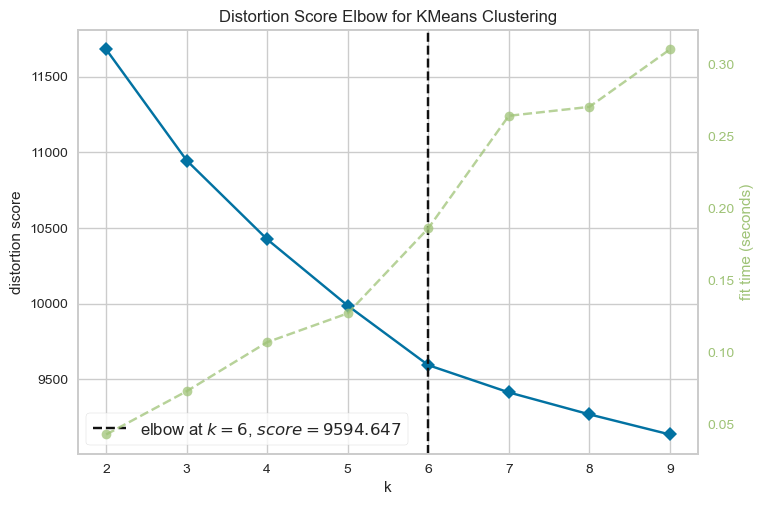

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
# Elbow Method for K means
#Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(x_train)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

#the elbow point is achieved with 6 clusters which is highlighted by the function itself.

In [98]:
kmeans = KMeans(n_clusters=6)
k_fit = kmeans.fit(x_train)

In [99]:
clustering = k_fit.labels_

In [100]:
clusters = x_train.copy()

In [101]:
clusters["Clusters for KMeans"] = clustering

In [102]:
clusters

,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size,Coverage,Education,EmploymentStatus,...,Income,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class,Clusters for KMeans
5715,0.033898,0.142857,0.404040,0.000000,0.000,0.171682,1.000000,0.0,0.75,1.00,...,0.000000,0.601620,0.5,1.0,0.5,1.000,1.000000,0.333333,1.0,0
72,0.292373,0.171429,0.060606,0.000000,0.000,0.000145,0.500000,0.5,0.00,0.25,...,0.340835,0.836914,0.0,0.0,0.5,0.625,0.000000,0.333333,0.8,4
564,0.067797,0.142857,0.141414,0.075834,0.000,0.191591,0.500000,0.5,0.25,1.00,...,0.000000,0.375484,0.5,1.0,0.5,0.375,0.000000,0.000000,1.0,0
8018,0.072034,0.457143,0.939394,0.000000,0.625,0.129375,1.000000,0.5,0.00,1.00,...,0.000000,0.534343,0.5,0.5,0.5,0.500,0.333333,0.000000,0.0,0
5263,0.322034,0.057143,0.787879,0.000000,0.500,0.255763,0.500000,0.5,0.50,0.25,...,0.148886,0.509334,0.5,0.5,0.5,0.375,0.000000,0.333333,0.6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6317,0.137037,0.971429,0.454545,0.000000,0.750,0.063155,0.500000,0.0,0.25,0.25,...,0.575200,0.745333,1.0,0.5,0.0,0.125,0.666667,0.666667,1.0,4
5146,0.245763,0.114286,0.464646,0.075834,1.000,0.146445,0.500000,0.0,0.50,0.25,...,0.930318,0.297992,1.0,0.0,0.0,0.250,0.666667,0.333333,0.6,3
7436,0.012712,0.285714,0.616162,0.000000,0.125,0.079880,0.500000,0.0,0.25,0.25,...,0.642069,0.195844,1.0,1.0,0.5,0.500,0.333333,0.000000,1.0,3
7365,0.131356,0.085714,0.282828,0.000000,0.375,0.228921,0.500000,0.5,0.25,1.00,...,0.000000,0.562170,0.5,1.0,0.5,0.625,0.000000,0.000000,0.0,5


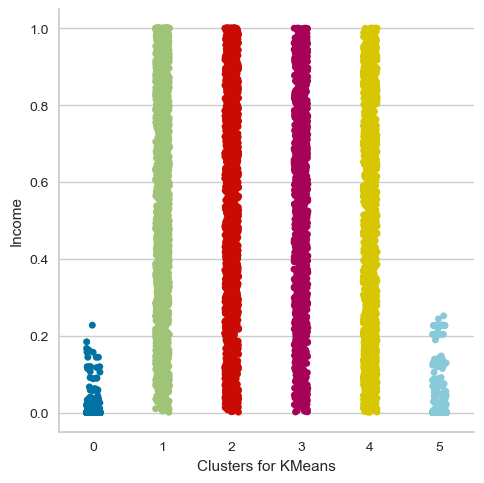

In [104]:
sns.catplot(x = "Clusters for KMeans", y = "Income", data = clusters)

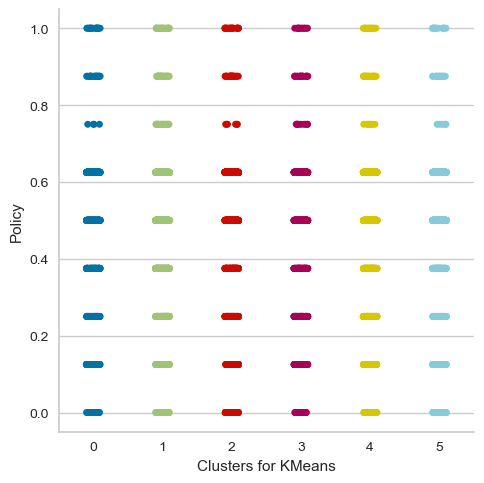

In [105]:
sns.catplot(x = "Clusters for KMeans", y = "Policy", data = clusters)